In [1]:
import leopardgecko as lg
import os

In [2]:
# **Configuration Settings**

#Set data filename and location here
data_filename = '/workspace/for_luis/2020-05-15_final_4_volumes_combined.h5'


#Data weighing
dweightingmethod = 'MaxMinSquare'

#Average Pooling settings
w_avg = 512 #Chunks for the average pooling 3D using the GPU. Should not affect final data
k_width = 256
s_stride= 128

bForceRecalculation = False
# True: In case AvgPool of score data already exists, force recalculation
# False: Use existing file if it exists

In [3]:
print ("Data filename : " , data_filename)
#Check if average pooling has already been done

Data filename :  /workspace/for_luis/2020-05-15_final_4_volumes_combined.h5


In [4]:
predicteddata_lg = lg.PredictedData(data_filename)

In [5]:
print("Shape: " , predicteddata_lg.data_da.shape )

Shape:  (2120, 2520, 2520)


In [6]:
#Get Maximum and minimum value
print ( "Values: max = {} , min = {} ".format(predicteddata_lg.vmax, predicteddata_lg.vmax) )

Values: max = 12 , min = 12 


## Consistency score (CS)

In [7]:
print ("Weighting data to get consistency score using method" ,dweightingmethod)

Weighting data to get consistency score using method MaxMinSquare


In [8]:
cs , cs_avg = predicteddata_lg.setWeightedData(dweightingmethod)

In [9]:
print("Consistency score whole volume average = {}".format(cs_avg))

Consistency score whole volume average = 31.63297872567528


## Average pooling of CS

Parameters used for average pooling

In [10]:
print("Sub-volume width : {}".format(k_width))
print("Stride (jump) : {}".format(s_stride))

Sub-volume width : 256
Stride (jump) : 128


In [11]:
#Decide here the filename of the file to store the avgpooled data
#If the file exists, then the calculation was probably been done before
# and existing file
#To override this and force recalculation (long) set flag ...

#Save file (locally, at the same folder as this notebook)
pathhead, pathtail = os.path.split(data_filename)
pathname , ext = os.path.splitext(pathtail)
newpathname = pathname + "_VolAvg_k" + str(k_width)+"_s"+str(s_stride)
newfilename = newpathname + '.h5'
print ("Consistency Score AvgPool3D data filename: ", newfilename)

Consistency Score AvgPool3D data filename:  2020-05-15_final_4_volumes_combined_VolAvg_k256_s128.h5


In [39]:
scoredata_lg = None

#Check file exists or if recalculation is intended
if ( os.path.exists(newfilename) and not bForceRecalculation) :
    print("File already exists, and recalculation is not required so the results in this file will be used")
    #Load data using leopardgecko ScoreData class
    scoredata_lg = lg.ScoreData.fromFile(newfilename)
    
else:
    #Calculate the AvgPool3D of the Consistency score
    scoredata_lg = predicteddata_lg.AvgPool3D_LargeData(w_avg , k_width , s_stride , do_weighting = False)
    scoredata_lg.saveToFile(filename)

File already exists, and recalculation is not required so the results in this file will be used


Histogram of Consistency score and regions-of-interest

Gaussian fit to peak, parameters amplitude=358.8877863645087 , mean=32.41279758349522 ,stdev=0.8238044108958923
Volume region with bad consistency  [ 640:896 , 1024:1280 , 0:256 ] centered at (768, 1152, 128) cscore=19.948430836200714
Volume region with bad-mid consistency  [ 640:896 , 1024:1280 , 0:256 ] centered at (768, 1152, 128) cscore=19.948430836200714
Volume region with mid consistency  [ 128:384 , 896:1152 , 768:1024 ] centered at (256, 1024, 896) cscore=30.01243132352829
Volume region with half-commonest consistency  [ 768:1024 , 896:1152 , 1024:1280 ] centered at (896, 1024, 1152) cscore=31.418264627456665
Volume region with commonest consistency  [ 768:1024 , 1024:1280 , 896:1152 ] centered at (896, 1152, 1024) cscore=32.43788939714432


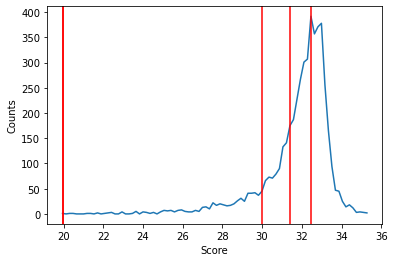

In [40]:
poi = scoredata_lg.SelectRegionsOfInterest_V0()

In [38]:
import importlib
importlib.reload(lg)

<module 'leopardgecko' from '/home/ypu66991/Programming/Git_LeopardGecko/leopardgecko.py'>